# Data Dive 3: Cleaning Data
### Making Sense of NYC Restaurant Inspection Data

[This dataset](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j) provides restaurant inspections, violations, grades and adjudication information. It is freely available through the NYC Open Data portal, though for the purposes of this exercise we'll be using a static version I pulled in early September 2018 that is available at the url below. A Data Dictionary is available [here](https://data.cityofnewyork.us/api/views/43nn-pn8j/files/e3160d37-1b15-41ef-af6b-a830ed39cbc0?download=true&filename=Restaurant_Inspection_Open_Data_Dictionary_082214.xlsx). 

Throughout this exercise, we'll be drawing on skills highlighted in the [DataCamp course](https://www.datacamp.com/courses/cleaning-data-in-python), as well as miscellaneous other commands I've introduced in the first two classes. [Ten Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) is a great reference for these. 


`https://grantmlong.com/data/DOHMH_New_York_City_Restaurant_Inspection_Results_20180911.csv`.  



In [1]:
import pandas as pd
import requests

%matplotlib inline

## Part 1: Load and Inspect
1. Load data from DataFrame
2. Find the number of rows and columns in the data
3. List the columns in the DataFrame
4. Display the first twenty rows


Load data from DataFrame

In [2]:
df = pd.read_csv('https://grantmlong.com/data/DOHMH_New_York_City_Restaurant_Inspection_Results_20180911.csv')

Find the number of rows and columns in the data

In [3]:
print(df.shape)

(376414, 18)


List the columns in the DataFrame

In [4]:
print(list(df))

['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE']


Display the first twenty rows

In [5]:
df.head(20)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50018348,EMPIRE III,MANHATTAN,1902,A C POWELL BLVD,10026.0,2122808880,Chinese,04/07/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,24.0,NaN,NaN,09/13/2018,Cycle Inspection / Initial Inspection
1,41706796,FOREST HILLS DINER,QUEENS,6860,AUSTIN STREET,11375.0,7189977744,American,05/21/2015,Violations were cited in the following area(s).,06B,"Tobacco use, eating, or drinking from open con...",Critical,27.0,NaN,NaN,09/13/2018,Cycle Inspection / Initial Inspection
2,41270009,FORTY CARROTS,MANHATTAN,1000,3 AVENUE,10022.0,2127053085,American,12/22/2016,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,11.0,A,12/22/2016,09/13/2018,Cycle Inspection / Initial Inspection
3,50047433,PUSH FITNESS CLUB,QUEENS,18810,UNION TPKE,11366.0,7184647874,American,04/13/2018,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,28.0,NaN,NaN,09/13/2018,Cycle Inspection / Initial Inspection
4,41163474,MIRIAM,BROOKLYN,79,5 AVENUE,11217.0,7186222250,Mediterranean,02/15/2017,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/15/2017,09/13/2018,Cycle Inspection / Re-inspection
5,40649463,LA BOINA ROJA STEAK HOUSE,QUEENS,8022,37 AVENUE,11372.0,7184246711,"Latin (Cuban, Dominican, Puerto Rican, South &...",01/12/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaN,09/13/2018,Cycle Inspection / Initial Inspection
6,41344229,GRACE PIZZA,QUEENS,7005,MYRTLE AVENUE,11385.0,7184176018,Pizza/Italian,10/24/2016,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,13.0,A,10/24/2016,09/13/2018,Cycle Inspection / Initial Inspection
7,41250025,YUNG SUN SEAFOOD RESTAURANT,MANHATTAN,47,EAST BROADWAY,10002.0,2123469888,Chinese,06/25/2018,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,12.0,A,06/25/2018,09/13/2018,Cycle Inspection / Re-inspection
8,50040952,FRESH WHITE SWAN BAKERY,MANHATTAN,88,E BROADWAY,10002.0,2122265333,Bakery,02/10/2017,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,02/10/2017,09/13/2018,Cycle Inspection / Re-inspection
9,50077042,COLD STONE CREAMERY,QUEENS,15714,CROSSBAY BLVD,11414.0,7188436977,"Ice Cream, Gelato, Yogurt, Ices",05/21/2018,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,17.0,NaN,NaN,09/13/2018,Pre-permit (Operational) / Initial Inspection


## Part 2: Explore and Summarize
1. Count the number of unique restaurants in the DataFrame.
2. Calculate the share of critical inpections.
3. Show a histogram of `SCORE`. 
4. Create a boxplot of `GRADE` against `SCORE`. 
5. Describe the `INSPECTION DATE` field. 
6. Count the number of null values for `VIOLATION DESCRIPTION`. 
7. Print twenty unique non-null values for `VIOLATION DESCRIPTION`. 


Count the number of unique restaurants in the DataFrame.

In [6]:
len(df.CAMIS.unique())

26739

Calculate the share of critical inpections.

In [7]:
sum(df['CRITICAL FLAG']=='Critical')/df.shape[0]

0.5481889621533736

Show a histogram of `SCORE`. 

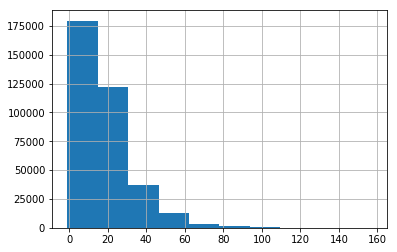

In [8]:
df.SCORE.hist()

Create a boxplot of `GRADE` against `SCORE`. 

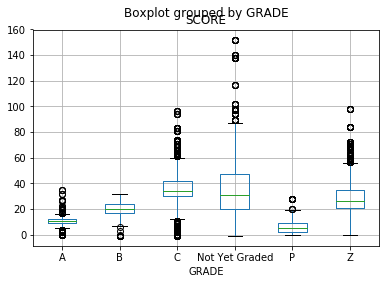

In [9]:
df.boxplot('SCORE', 'GRADE')

Describe the `INSPECTION DATE` field. 

In [10]:
df['INSPECTION DATE'].describe()

count         376414
unique          1329
top       01/01/1900
freq            1211
Name: INSPECTION DATE, dtype: object

Count the number of null values for VIOLATION DESCRIPTION.

In [11]:
sum(df['VIOLATION DESCRIPTION'].isnull())

7722

Print twenty unique violation descriptions.

In [12]:
for d in df['VIOLATION DESCRIPTION'].unique()[:20]:
    print(d, '\n')

Evidence of mice or live mice present in facility's food and/or non-food areas. 

Tobacco use, eating, or drinking from open container in food preparation, food storage or dishwashing area observed. 

Proper sanitization not provided for utensil ware washing operation. 

Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation. 

Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist. 

Food contact surface not properly maintained. 

Sanitized equipment or utensil, including in-use food dispensing utensil, improperly used or stored. 

Food not protected from potential source of contamination during storage, preparation, transportation, display or service. 

Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies 

## Part 3: Create Clean Variables
1. Transform `INSPECTION DATE` to datetime in new variable `inspection_datetime`.
2. Create a `inspection_year` variable with the year of the `INSPECTION DATE`.
4. Drop observations with `inspection_year` before 2014. 
5. Drop observations with null values for `VIOLATION DESCRIPTION`. 
6. Create a `found_vermin` variable for any `VIOLATION DESCRIPTION` containing *vermin*, *mouse*, *mice*, or *rat*.
7. Create a `found_bugs` variable for any `VIOLATION DESCRIPTION` containing *insect*, *roach*, or *flies*.
8. Create a `bad_temp` variable for any `VIOLATION DESCRIPTION` containing *temperature* or *Âº F*.


Transform `INSPECTION DATE` to datetime in new variable `inspection_datetime`.

In [13]:
df['inspection_datetime'] = pd.to_datetime(df['INSPECTION DATE'])

Create an `inspection_year` variable with the year of the `INSPECTION DATE`.


In [14]:
df['inspection_year'] = df['inspection_datetime'].dt.year

Drop observations with `inspection_year` before 2014. 

(375190, 20)


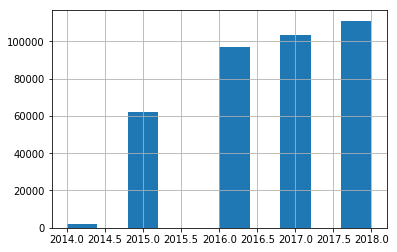

In [15]:
df = df.loc[(df.inspection_year>=2014),]
print(df.shape)
df.inspection_year.hist()

Drop observations with null values for `VIOLATION DESCRIPTION`.

In [16]:
df = df.loc[(df['VIOLATION DESCRIPTION'].notnull()),]
print(df.shape)

(368680, 20)


Create a `found_vermin` variable for any `VIOLATION DESCRIPTION` containing *vermin*, *mouse*, *mice*, or *rat*.


In [17]:
df['found_vermin'] = df['VIOLATION DESCRIPTION'].str.contains('vermin|mouse|mice|rat')

df.found_vermin.sum()

157760

Create a `found_bugs` variable for any `VIOLATION DESCRIPTION` containing *insect*, *roach*, or *flies*.

In [18]:
df['found_bugs'] = df['VIOLATION DESCRIPTION'].str.contains('insect|roach|flies')

df.found_bugs.sum()

27346

## Part 4: Create a Working Subset

1. Create a working subset DataFrame called `rest_df` with data grouped by restaurant - take the max value for the following fields: `'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'inspection_datetime',` and `'inspection_year'`.
2. Create another working subset DataFrame called `violation_df` with data grouped by restaurant - take the sum value for `'found_vermin'` and `'found_bugs'`.
3. Merge `rest_df` with `violation_df` to create `new_df`.
4. Show the top 20 value_counts for `CUISINE DESCRIPTION`.
5. Use the `cuisine_dict` to create a `cuisine_new` column with the `CUISINE DESCRIPTION`
6. Replace the `CUISINE DESCRIPTION` for `CafÃ©/Coffee/Tea` with `Coffee`.

Create a working subset DataFrame called `rest_df` with data grouped by restaurant - take the max value for the following fields: `'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'inspection_datetime',` and `'inspection_year'`.


In [19]:
rest_df = df[['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 
             'CUISINE DESCRIPTION', 'inspection_datetime', 'inspection_year']
            ].groupby('CAMIS').max()

rest_df.head(3)

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,inspection_datetime,inspection_year
CAMIS,,,,,,,,,
30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,2018-05-11,2018
30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,2018-03-13,2018
30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,2018-05-16,2018


Create another working subset DataFrame called `violation_df` with data grouped by restaurant - take the sum value for `'found_vermin'` and `'found_bugs'`.


In [20]:
violation_df = df[['CAMIS', 'found_vermin', 'found_bugs']].groupby('CAMIS').sum()

violation_df.head(3)

,found_vermin,found_bugs
CAMIS,,
30075445,2.0,0.0
30112340,9.0,3.0
30191841,7.0,1.0


Join `rest_df` with `violation_df` to create `new_df`.


In [21]:
new_df = rest_df.join(violation_df)

Show the top 20 value_counts for `CUISINE DESCRIPTION`.

In [22]:
new_df['CUISINE DESCRIPTION'].value_counts().head(5)

American            5901
Chinese             2398
CafÃ©/Coffee/Tea    1672
Pizza               1179
Italian              998
Name: CUISINE DESCRIPTION, dtype: int64

Replace the `CUISINE DESCRIPTION` for `CafÃ©/Coffee/Tea` with `Coffee`.

In [23]:
new_df.loc[new_df['CUISINE DESCRIPTION']=='CafÃ©/Coffee/Tea', 'CUISINE DESCRIPTION'] = 'Coffee'

new_df['CUISINE DESCRIPTION'].value_counts().head(5)

American    5901
Chinese     2398
Coffee      1672
Pizza       1179
Italian      998
Name: CUISINE DESCRIPTION, dtype: int64

## Bonus Round: Using Outside Resources to Clean Data

Oftentimes, external services - or even services from other teams within your own company - will exist to help process data. One handy example case we can use here is the [NYC Geoclient](https://api.cityofnewyork.us/geoclient/v1/doc), a REST api that returns location information for an arbitrary address in New York City. It's an awesome resource!

For the purposes of this exercise, I've included an API id below and gave you the key in class, but you can sign up for your own key at the [NYC Developer Portal](https://developer.cityofnewyork.us/).

We can use this to find the exact location for each coffee shop in our data set. 

1. First, create a function to return the latitude and longitude for a given building number, street address, borough, and zip code. 
2. Next, create a new subset of data for a single cuisine. 
3. Apply the function from Step 1 to the df from Step 2.


In [24]:
def get_coordinates(row):

    url = 'https://api.cityofnewyork.us/geoclient/v1/address.json'

    params = {
        'houseNumber' : row['BUILDING'],
        'street' : row['STREET'],
        'borough' : row['BORO'],
        'zip' : row['ZIPCODE'],    
        'app_id' : '7cc1b653',
        'app_key' : 'xxxxxx',   
    }

    raw_response = requests.get(url, params)
    
    try: 
        lat = raw_response.json()['address']['latitude']
        long = raw_response.json()['address']['longitude']
        value = str(lat) + ',' + str(long)
    except KeyError:
        value = None
    
    return value

In [25]:
cuisine_df = new_df.loc[new_df['CUISINE DESCRIPTION']=='Ice Cream, Gelato, Yogurt, Ices', ]

In [26]:
cuisine_df['coordinates'] = cuisine_df.apply(get_coordinates, axis=1)

/Users/grant/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
cuisine_df['latitude'] = cuisine_df.coordinates.str.split(',').str.get(0).astype(float)
cuisine_df['longitude'] = cuisine_df.coordinates.str.split(',').str.get(1).astype(float)


/Users/grant/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/grant/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


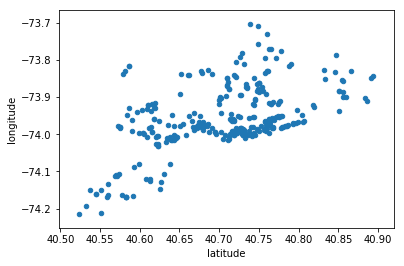

In [28]:
cuisine_df.plot.scatter('latitude', 'longitude')